In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import warnings
warnings.simplefilter("ignore")

In [3]:
data=pd.read_csv(r"C:\Users\mohamed\Downloads\data\Mall_Customers.csv")

# EDA

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data['Annual Income (k$)']*=1000
data['Spending Score (1-100)']/=100

In [7]:
data=data.rename(columns={'Annual Income (k$)':'Annual Income ($)' , 'Spending Score (1-100)':'Spending Score (%)'})

In [8]:
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (%)
0,1,Male,19,15000,0.39
1,2,Male,21,15000,0.81
2,3,Female,20,16000,0.06
3,4,Female,23,16000,0.77
4,5,Female,31,17000,0.40


In [9]:
data.isna().sum()

CustomerID            0
Gender                0
Age                   0
Annual Income ($)     0
Spending Score (%)    0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data['Annual Spending Money ($)']=data['Annual Income ($)']*data['Spending Score (%)']

In [12]:
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (%),Annual Spending Money ($)
0,1,Male,19,15000,0.39,5850.0
1,2,Male,21,15000,0.81,12150.0
2,3,Female,20,16000,0.06,960.0
3,4,Female,23,16000,0.77,12320.0
4,5,Female,31,17000,0.40,6800.0


The data is ready to analysis 

In [13]:
data.describe(include='all')

,CustomerID,Gender,Age,Annual Income ($),Spending Score (%),Annual Spending Money ($)
count,200.000000,200,200.000000,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60560.000000,0.502000,30467.950000
std,57.879185,NaN,13.969007,26264.721165,0.258235,22912.532905
min,1.000000,NaN,18.000000,15000.000000,0.010000,570.000000
25%,50.750000,NaN,28.750000,41500.000000,0.347500,16550.000000
50%,100.500000,NaN,36.000000,61500.000000,0.500000,25265.000000
75%,150.250000,NaN,49.000000,78000.000000,0.730000,34040.000000


## Correlation 

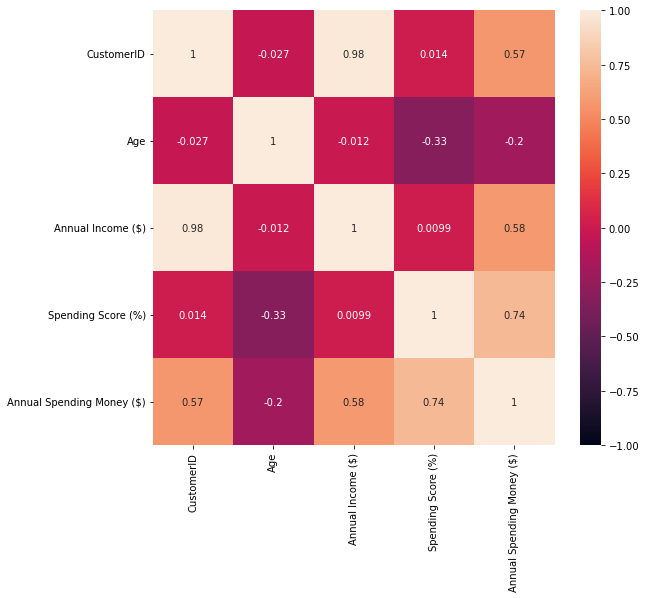

In [14]:
plt.figure(figsize=(9,8))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

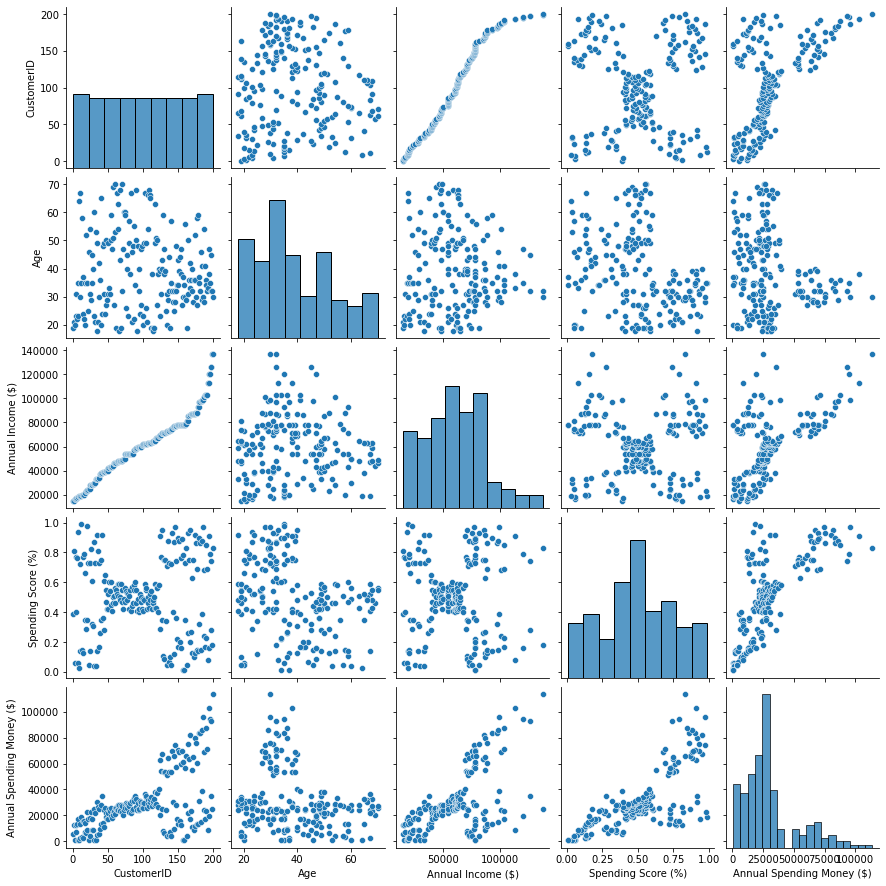

In [15]:
sns.pairplot(data)
plt.show()

### Gender

In [16]:
gender=data['Gender'].value_counts()

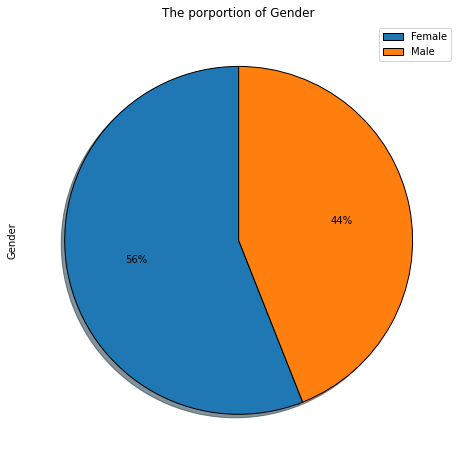

In [17]:
plt.figure(figsize=(9,8))
gender.plot(kind='pie',shadow=True,wedgeprops={'edgecolor':'black'},autopct="%1.0f%%",startangle=90,labels=None)
plt.legend(labels=gender.index, loc='upper right')
plt.title("The porportion of Gender")
plt.show()

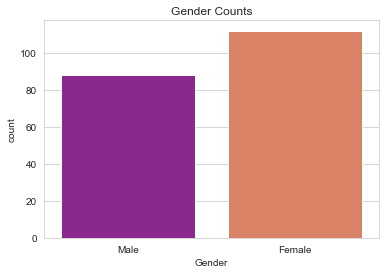

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',data=data,palette='plasma')
plt.title('Gender Counts')
plt.show()

### Age

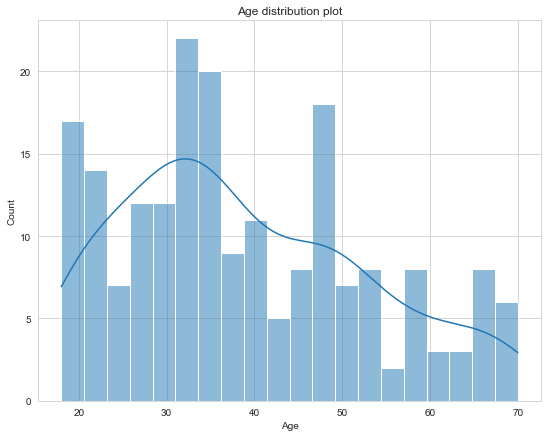

In [19]:
plt.figure(figsize=(9,7))
sns.histplot(data['Age'],bins=20,kde=True)
plt.title('Age distribution plot')
plt.show()

This shows that our data has customer ranges from 10 years to 80 years.

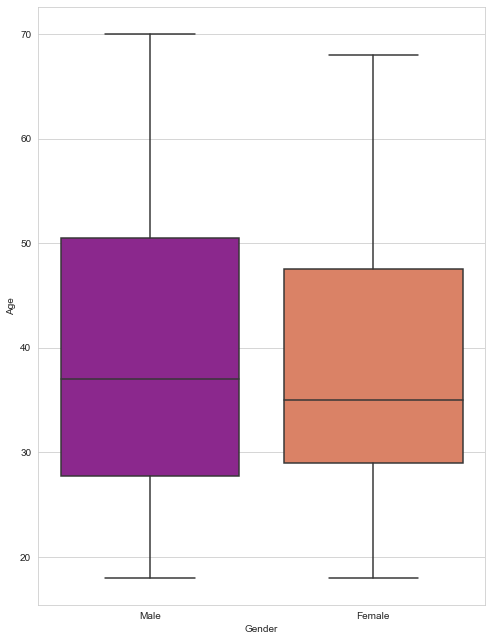

In [20]:
plt.figure(figsize=(8,11))
sns.boxplot(data=data,y='Age',x='Gender',palette='plasma')
plt.show()

Based on 5 point summary we can get a clear picture of various aspect of customer based on their age for each gender.

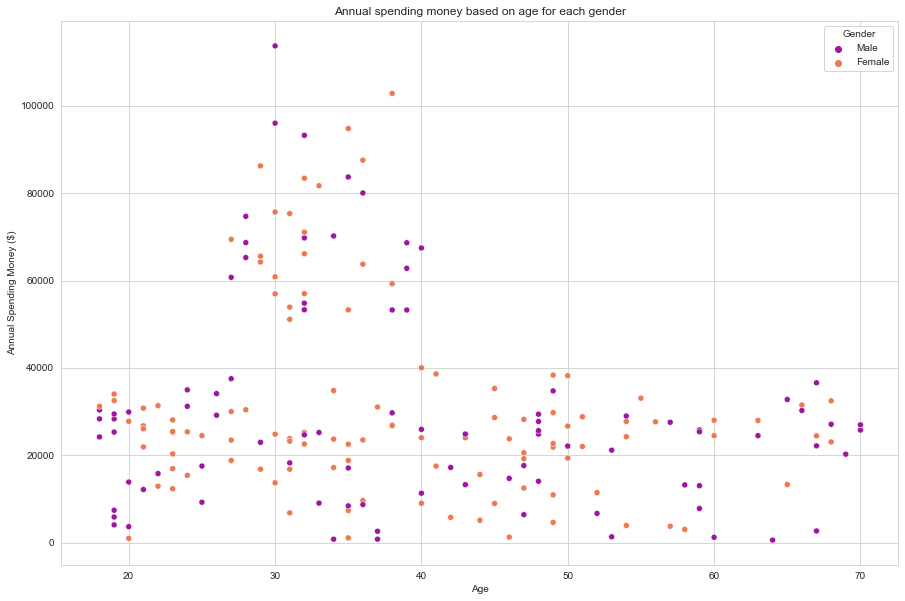

In [21]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=data,x='Age',y='Annual Spending Money ($)',palette='plasma',hue='Gender')
plt.title('Annual spending money based on age for each gender')
plt.show()

### Annual income 

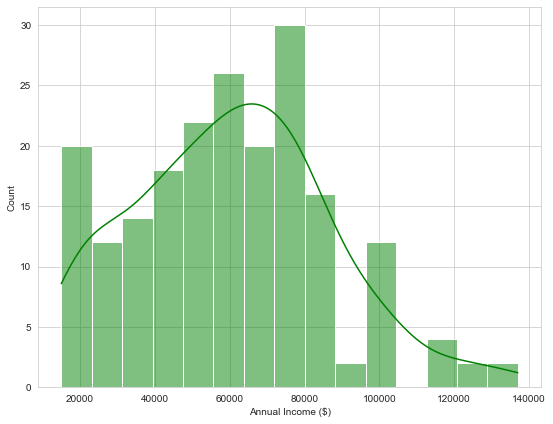

In [22]:
plt.figure(figsize=(9,7))
sns.histplot(data=data,x='Annual Income ($)',kde=True,bins=15,color='green')
plt.show()

In [23]:
Q1=data['Annual Income ($)'].quantile(0.25)
Q2=data['Annual Income ($)'].median()
Q3=data['Annual Income ($)'].quantile(0.75)
maximum=data['Annual Income ($)'].max()
label=['Economy','Premium Economy','Business Class','First Class']
bins=[0,Q1,Q2,Q3,maximum]
data['Income Category']=pd.cut(data['Annual Income ($)'],labels=label,bins=bins)
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (%),Annual Spending Money ($),Income Category
0,1,Male,19,15000,0.39,5850.0,Economy
1,2,Male,21,15000,0.81,12150.0,Economy
2,3,Female,20,16000,0.06,960.0,Economy
3,4,Female,23,16000,0.77,12320.0,Economy
4,5,Female,31,17000,0.40,6800.0,Economy


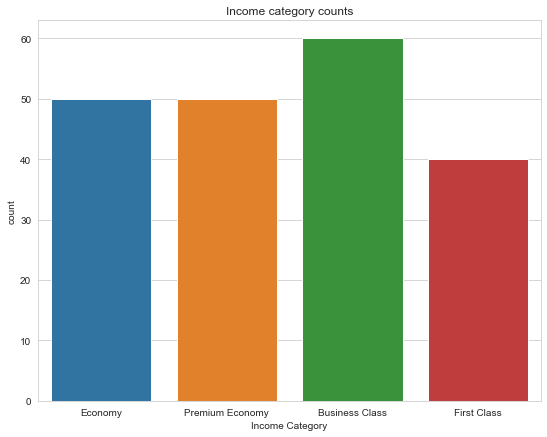

In [24]:
plt.figure(figsize=(9,7))
sns.countplot(x='Income Category',data=data)
plt.title('Income category counts')
plt.show()

Business class income has highest number of customers 60.

In [25]:
data.groupby('Income Category')['Gender'].value_counts().unstack()

Gender,Female,Male
Income Category,,
Economy,32,18
Premium Economy,27,23
Business Class,32,28
First Class,21,19


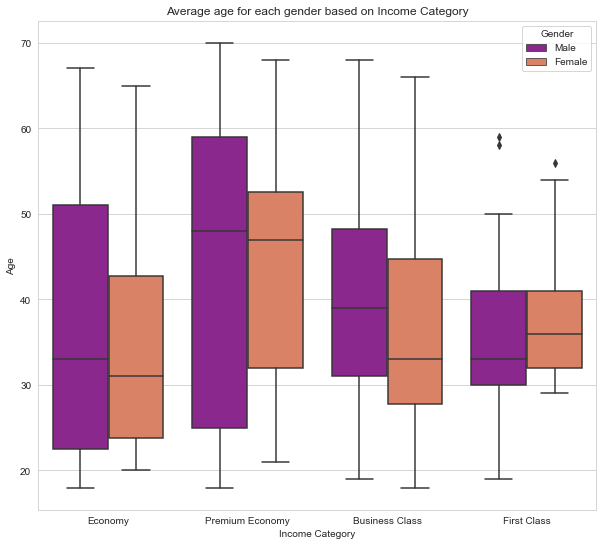

In [26]:
plt.figure(figsize=(10,9))
sns.boxplot(data=data,y='Age',x='Income Category',palette='plasma',hue='Gender')
plt.title('Average age for each gender based on Income Category')
plt.show()

In [27]:
data.groupby('Income Category').agg({'Annual Income ($)':['median'],'Spending Score (%)':['mean'],'Annual Spending Money ($)':['mean']})

,Annual Income ($),Spending Score (%),Annual Spending Money ($)
,median,mean,mean
Income Category,,,
Economy,28000.0,0.494800,13507.200000
Premium Economy,54000.0,0.503800,25970.400000
Business Class,71000.0,0.501333,35424.333333
First Class,95000.0,0.509750,49856.250000


### Spending Score (%)

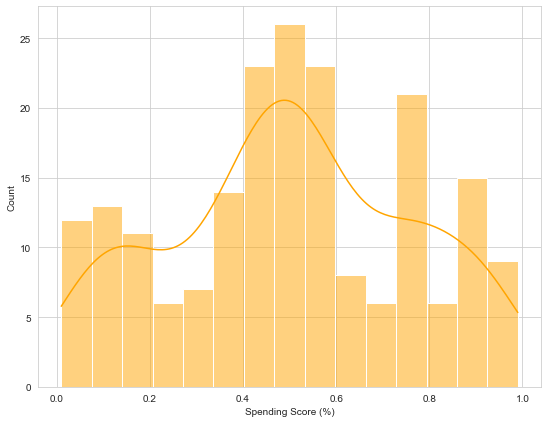

In [28]:
plt.figure(figsize=(9,7))
sns.histplot(data=data,x='Spending Score (%)',kde=True,bins=15,color='orange')
plt.show()

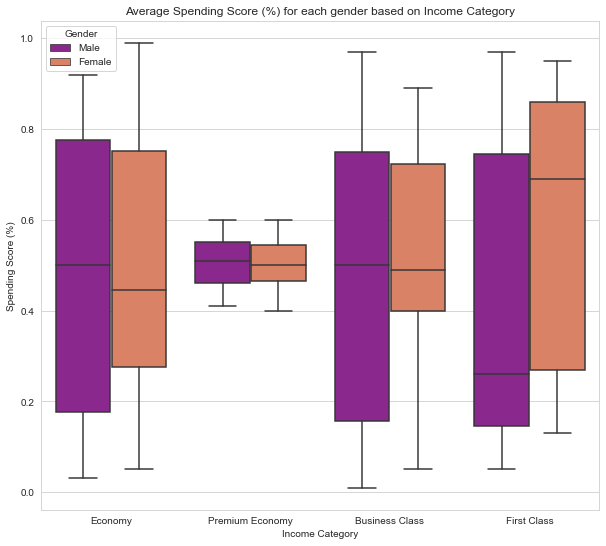

In [29]:
plt.figure(figsize=(10,9))
sns.boxplot(data=data,y='Spending Score (%)',x='Income Category',palette='plasma',hue='Gender')
plt.title('Average Spending Score (%) for each gender based on Income Category')
plt.show()

# Model building 

In [36]:
features=data.iloc[:,3:5]
features.iloc[:,0]/=1000
features.iloc[:,1]*=100
features.head()

,Annual Income ($),Spending Score (%)
0,15.0,39.0
1,15.0,81.0
2,16.0,6.0
3,16.0,77.0
4,17.0,40.0


In [37]:
wcss=[]
for k in range(1,20):
    kmeans=KMeans(n_clusters=k,random_state=69)     
    kmeans.fit(features)             
    wcss.append(kmeans.inertia_)
    
wcss[:6]  

[269981.2800000001,
 183499.07470288622,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002]

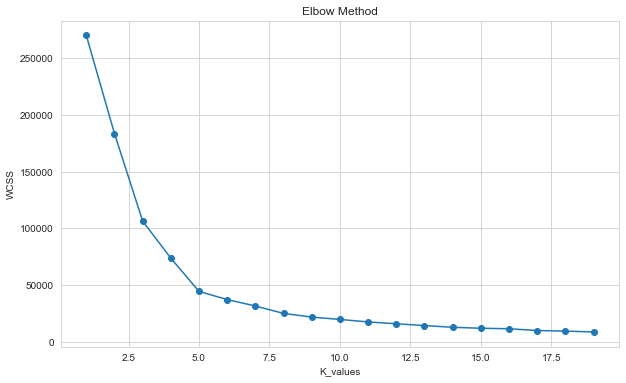

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),wcss,marker="o")

plt.xlabel('K_values')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [40]:
kval=5

kmeans=KMeans(n_clusters=kval,max_iter=10,random_state=69)
kmeans.fit(features)

KMeans(max_iter=10, n_clusters=5, random_state=69)

In [41]:
labels=kmeans.labels_
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [42]:
centroids=kmeans.cluster_centers_
centroids

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [43]:
new_features=features.assign(clusters=pd.DataFrame(labels))
new_features

,Annual Income ($),Spending Score (%),clusters
0,15.0,39.0,4
1,15.0,81.0,3
2,16.0,6.0,4
3,16.0,77.0,3
4,17.0,40.0,4
...,...,...,...
195,120.0,79.0,1
196,126.0,28.0,2
197,126.0,74.0,1
198,137.0,18.0,2


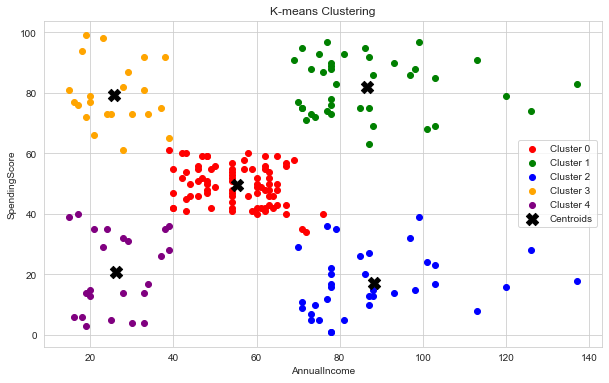

In [46]:
plt.figure(figsize=(10, 6))

# Plot each cluster's data points with different colors
clr=["red","green","blue","orange","purple"]
for cluster_num in range(kval):
    plt.scatter(x=new_features[new_features.clusters == cluster_num]['Annual Income ($)'],
               y= new_features[new_features.clusters == cluster_num]['Spending Score (%)'],marker='o',c=clr[cluster_num]
               ,label=f'Cluster {cluster_num}')

# Plot the cluster centers
plt.scatter(x=centroids[:, 0], y=centroids[:, 1],
            c='black', marker='X', s=150, label='Centroids')

plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [47]:
score=metrics.silhouette_score(features,kmeans.labels_)
print("Silhouette_Score Coefficient : {:.2f}".format(score))

Silhouette_Score Coefficient : 0.55
